### **Step 1: Import Libraries**

**Purpose:** Import necessary libraries for:
- image processing **(cv2)**, 
- file handling **(os, shutil)**
- plotting **(matplotlib)**
- Random Shuffle **(random)**, and to 
- suppress warnings **(warnings)**.

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import random
import shutil

### **Step 2: Set Dataset Paths and Initialize Variables**

- **Purpose:** Define the paths for the image and label datasets and specify the subfolders **(train, val, test)** that the dataset is organized into.

In [2]:
filtered_img_data = "../Data/tiny_object_detection_yolo/filtered_images"  # Path to the dataset images
filtered_img_labels = "../Data/tiny_object_detection_yolo/filtered_labels" # Path to the dataset labels

sub_folders = ["train", "test", "val"] # List of subfolders

### **Step 3: Read YOLO Annotations**
- **Purpose:** Define a function to read and parse YOLO annotation files, converting each line into a list of floating-point values.

In [3]:
def yolo_labels(labels_path):
    with open(labels_path) as f: # open file
        lines = f.readlines()   # read lines
    
    boxes = []  # list of boxes
    for line in lines: # loop over lines
        values = line.strip().split() # convert each line into a list of floating-point values
        class_id = int(values[0]) # class id
        x, y, w, h = map(float, values[1:]) # position of each box
        boxes.append([x, y, w, h, class_id]) # add boxes to list of boxes
    
    return boxes # return list of boxes

### **Step 4:** 📝 Load and Visualize the Dataset With Annotations
**🛠 What This Code Does**
- ✅ Loads all image paths from the dataset folder.
- ✅ Reads corresponding YOLO annotations from .txt files.
- ✅ Draws bounding boxes (red for "Building", green for other classes).
- ✅ Displays 5 sample images with their annotations.

In [4]:
def plot_sample_images(dataset_path, labels_path, num_samples=5):  
    """
    Function to plot sample images with their bounding box annotations.

    Parameters:
    dataset_path (str): Path to the directory containing images.
    labels_path (str): Path to the directory containing YOLO annotation files.
    num_samples (int): Number of sample images to display (default is 5).

    Returns:
    None (Displays the images with bounding boxes).
    """

    # Create a figure with subplots to display 'num_samples' images
    fig, axes = plt.subplots(1, num_samples, figsize=(20, 5))  

    # Get a list of all image files in the dataset directory
    image_files = os.listdir(dataset_path)  
    
    # Shuffle the image list to select random samples
    random.shuffle(image_files)

    # Loop through the first 'num_samples' images in the shuffled list
    for i, img_file in enumerate(image_files[:num_samples]):  
        
        # Construct the full path for the image file
        img_path = os.path.join(dataset_path, img_file)  
        
        # Construct the corresponding label file path (assumes YOLO format)
        label_path = os.path.join(labels_path, img_file.replace('.png', '.txt'))  

        # Read the image using OpenCV
        img = cv2.imread(img_path)  
        
        # Convert the image from BGR (OpenCV default) to RGB (for correct matplotlib display)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  

        # Check if the corresponding label file exists
        if os.path.exists(label_path):  
            # Read bounding box annotations from the YOLO label file
            boxes = yolo_labels(label_path)  
            
            # Get image dimensions (height, width, number of channels)
            h, w, _ = img.shape  

            # Loop through each bounding box in the label file
            for box in boxes:  
                class_id, x_center, y_center, box_width, box_height = box  # Extract values
                
                # Convert YOLO format (normalized) to absolute pixel coordinates
                x1 = int((x_center - box_width / 2) * w)  
                y1 = int((y_center - box_height / 2) * h)  
                x2 = int((x_center + box_width / 2) * w)  
                y2 = int((y_center + box_height / 2) * h)  

                # Draw the bounding box on the image (Blue color, thickness=2)
                cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)  

        # Display the image on the corresponding subplot
        axes[i].imshow(img)  
        axes[i].axis('off')  # Hide axes for better visualization

    # Show the final plot with images and bounding boxes
    plt.show()  

#### **Loop through the images and bounding boxes and plot them**


📂 Plotting train data samples:


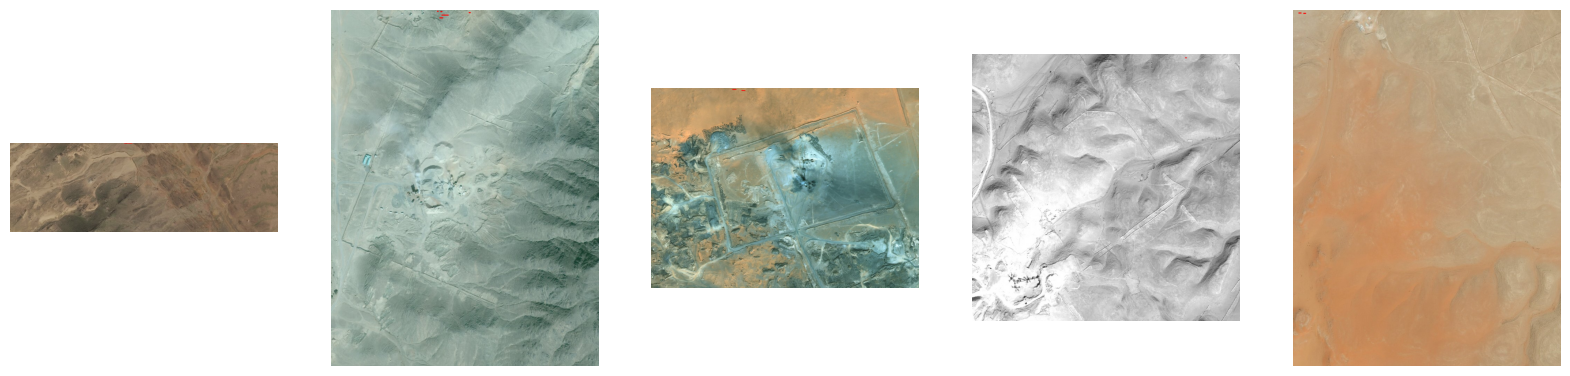

In [5]:
for subset in sub_folders:
    print(f"\n📂 Plotting {subset} data samples:")
    dataset_path = os.path.join(filtered_img_data, subset)
    labels_path = os.path.join(filtered_img_labels, subset)
    plot_sample_images(dataset_path, labels_path)
    
    break

### **Step 5:** Check Dataset Statistics

**Function:** check_dataset_stats(filtered_img_data, sub_folders, dataset_stats)

- **Purpose:** Counts the number of images in each dataset split (train, val, test).

**Parameters:**
- filtered_img_data: Path to the dataset folder containing the images.
- sub_folders: List of dataset splits (train, val, test).
- dataset_stats: Dictionary to store the dataset statistics.

**Process:**
1. Loops through each subset (train, val, test).
2. Counts the number of images in each subset.
3. Stores the count in the dataset_stats dictionary.
4. Prints the dataset distribution.

In [6]:
dataset_stats = {} # dictionary

In [7]:
# Function to check the dataset statistics (counts images in train, val, test)
def check_dataset_stats(filtered_img_data, sub_folders, dataset_stats):
    for subset in sub_folders:
        subset_path = os.path.join(filtered_img_data, subset)  # Path to dataset split
        num_images = len([f for f in os.listdir(subset_path) if f.endswith(('.jpg', '.png', '.jpeg'))])  # Count images
        dataset_stats[subset] = num_images  # Store in dictionary

    # Print dataset distribution
    print("\n📊 Dataset Distribution:")
    for subset, count in dataset_stats.items():
        print(f"📂 {subset.capitalize()} Set: {count} images")  # Display count of images in each set

### **Step 6:** Check Dataset Distribution

**Function:** check_dataset_distribution(dataset_stats)

**Purpose:** Calculates and prints the percentage split of the dataset.

**Process:**
1. Retrieves the number of images in train, val, and test sets.
2. Calculates the percentage split of each set.
3. Checks if the dataset split is balanced.
4. Prints a warning if the dataset needs rebalancing.

In [8]:
# Function to check dataset distribution in percentages
def check_dataset_distribution(dataset_stats):
    train_size = dataset_stats.get('train', 0)
    val_size = dataset_stats.get('val', 0)
    test_size = dataset_stats.get('test', 0)

    total_size = train_size + val_size + test_size  # Compute total dataset size

    if total_size > 0:
        train_ratio = (train_size / total_size) * 100  # Train split percentage
        test_ratio = (test_size / total_size) * 100    # Test split percentage
        val_ratio = (val_size / total_size) * 100      # Validation split percentage
        
        print("\n📌 Percentage Split:")
        print(f"📊 Train: {train_ratio:.2f}%")
        print(f"📊 Validation: {val_ratio:.2f}%")
        print(f"📊 Test: {test_ratio:.2f}%")  
        
        # Ideal split: ~80% train, 10% val, 10% test
        if train_ratio < 70 or val_ratio < 9 or test_ratio < 10:
            print("\n⚠️ Warning: The dataset split may be imbalanced. Consider adjusting the distribution.")
        else:
            print("\n✅ The dataset split looks balanced. You can proceed with training.")

In [9]:
# Check dataset stats before balancing
check_dataset_stats(filtered_img_data, sub_folders, dataset_stats)


📊 Dataset Distribution:
📂 Train Set: 158 images
📂 Test Set: 33 images
📂 Val Set: 50 images


In [10]:
# Check dataset distribution before balancing
check_dataset_distribution(dataset_stats)


📌 Percentage Split:
📊 Train: 65.56%
📊 Validation: 20.75%
📊 Test: 13.69%

⚠️ Warning: The dataset split may be imbalanced. Consider adjusting the distribution.


### **Dataset Condition:**
- **Our dataset split is not extremely imbalanced, but ideally, the training set should be around 75-80%, with validation and test each around 10-15%.**

**📌 How to Balance the Dataset?**
- Increase training data by moving some images from val to train.
- Reduce the validation set slightly to keep a balance.

**🎯 Ideal Target:**
- Train: ~180-190 images (around 75-80% of total)
- Validation: ~25-30 images (around 10-12%)
- Test: ~25-30 images (around 10-12%)


**✅ Steps to Adjust the Dataset**<br>
   - **1️⃣ Move some validation images (20-25) to the train set.**<br>
   - **2️⃣ Ensure the test set remains ~10-15% of total images.**<br>
   - **3️⃣ Re-run the dataset check script to verify the balance.**<br>

### **Step 7:** 📌 Balance Dataset (Move Images + Labels)

**Function:** data_balancer(filtered_base_path, num_to_move)

**Purpose:** Moves a specified number of images and their corresponding labels from val to train to balance the dataset.

**Parameters:**
- filtered_base_path: Path to the base dataset directory.
- num_to_move: Number of images & labels to move from validation to training.

**Process:**
1. Defines the paths for filtered images and labels.
2. Retrieves a list of images in the validation set.
3. Moves num_to_move images and their corresponding labels from validation to training.
4. Prints a success message if files are moved successfully.

In [11]:
def data_balancer(filtered_base_path, train_percentage=0.75, val_percentage=0.10, test_percentage=0.15):
    """
    Balances the dataset by ensuring the partition between train, val, and test is as per the given percentages.
    The test set remains unchanged, and only the val set is adjusted by moving images to the train set.
    
    Parameters:
    filtered_base_path (str): Path to the base directory containing 'filtered_images' and 'filtered_labels'.
    train_percentage (float): Desired percentage of the dataset for training (default is 0.75).
    val_percentage (float): Desired percentage of the dataset for validation (default is 0.10).
    test_percentage (float): Desired percentage of the dataset for testing (default is 0.15).
    """

    # Define paths to images and labels
    filtered_images_path = os.path.join(filtered_base_path, "filtered_images")
    filtered_labels_path = os.path.join(filtered_base_path, "filtered_labels")

    # Define paths for train, val, and test images and labels
    train_img_path = os.path.join(filtered_images_path, "train")
    val_img_path = os.path.join(filtered_images_path, "val")
    test_img_path = os.path.join(filtered_images_path, "test")
    
    train_lbl_path = os.path.join(filtered_labels_path, "train")
    val_lbl_path = os.path.join(filtered_labels_path, "val")
    test_lbl_path = os.path.join(filtered_labels_path, "test")
    
    # Get all images in the validation set
    val_images = [f for f in os.listdir(val_img_path) if f.endswith(('.jpg', '.png', '.jpeg'))]
    
    # Get the total number of images in the dataset (train + val + test)
    total_images = sum([len([f for f in os.listdir(path) if f.endswith(('.jpg', '.png', '.jpeg'))])
                        for path in [train_img_path, val_img_path, test_img_path]])
    
    # Calculate the target number of images for each set
    target_train_size = int(total_images * train_percentage)
    target_val_size = int(total_images * val_percentage)
    target_test_size = int(total_images * test_percentage)
    
    # Calculate current size of the training, validation, and test sets
    current_train_size = len([f for f in os.listdir(train_img_path) if f.endswith(('.jpg', '.png', '.jpeg'))])
    current_val_size = len([f for f in os.listdir(val_img_path) if f.endswith(('.jpg', '.png', '.jpeg'))])
    current_test_size = len([f for f in os.listdir(test_img_path) if f.endswith(('.jpg', '.png', '.jpeg'))])

    # Calculate how many images need to be moved from validation to training
    images_to_move = current_val_size - target_val_size

    # Ensure the validation and training set sizes are correct
    if images_to_move > 0:
        print(f"⚠️ Moving {images_to_move} images from Validation → Train set to meet target distribution.")
        
        # Move images from val to train
        for img in os.listdir(val_img_path)[:images_to_move]:
            img_src = os.path.join(val_img_path, img)
            img_dest = os.path.join(train_img_path, img)

            # Move label files (same name as image)
            label_file = img.replace(".jpg", ".txt").replace(".png", ".txt")
            label_src = os.path.join(val_lbl_path, label_file)
            label_dest = os.path.join(train_lbl_path, label_file)

            # Move image to train folder
            shutil.move(img_src, img_dest)

            # Move corresponding label (if it exists)
            if os.path.exists(label_src):
                shutil.move(label_src, label_dest)

        print(f"✅ Successfully moved {images_to_move} images from Validation → Train set.")
    else:
        print("✅ No need to move images from Validation → Train set.")

In [12]:
# Define dataset path
filtered_base_path = "../Data/tiny_object_detection_yolo"

# Call the data_balancer function to balance the dataset partitions
data_balancer(filtered_base_path)

⚠️ Moving 26 images from Validation → Train set to meet target distribution.
✅ Successfully moved 26 images from Validation → Train set.


In [13]:
# Check dataset stats after balancing
check_dataset_stats(filtered_img_data, sub_folders, dataset_stats)


📊 Dataset Distribution:
📂 Train Set: 184 images
📂 Test Set: 33 images
📂 Val Set: 24 images


In [14]:
# Check dataset distribution after balancing
check_dataset_distribution(dataset_stats)


📌 Percentage Split:
📊 Train: 76.35%
📊 Validation: 9.96%
📊 Test: 13.69%

✅ The dataset split looks balanced. You can proceed with training.


### **Summary of the Process:**

- 1️⃣ **Check Dataset Statistics** → Count images in train, val, and test.
- 2️⃣ **Check Dataset Distribution** → Calculate and print dataset split percentages.
- 3️⃣ **Balance Dataset (if needed)** → Move images & labels from val → train.
- 4️⃣ **Re-check Dataset Stats** → Ensure dataset is now balanced before training.

### **Final Notes:**
✅ If the dataset is well balanced, you can move forward with training.<br>
⚠️ If the dataset is still imbalanced, consider adjusting the number of images moved.